<a href="https://colab.research.google.com/github/jill-05/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading and Reading Dataset

In [ ]:
#loading the dataset
file_path = '/content/creditcard.csv'
data = pd.read_csv(file_path)


In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking null values

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
data = data.drop(['Time'],axis=1)

In [ ]:
data.shape

(284807, 30)

In [ ]:
#Checking Duplicate Vlues
data.duplicated().any()

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(275663, 30)

In [ ]:
#difference
284807 - 275663

9144

In [ ]:
# Class 0: Legit Transaction
# Class 1: Fraudulent Transaction
data['Class'].value_counts()


0    275190
1       473
Name: Class, dtype: int64

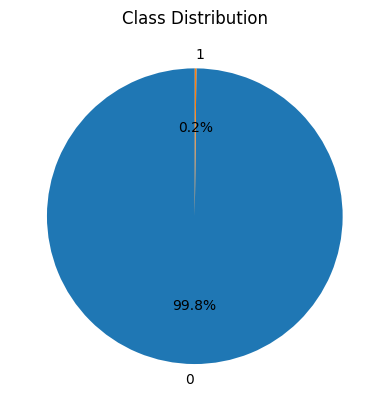

In [ ]:
class_counts = data['Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%'
        , startangle=90)
plt.title('Class Distribution')
plt.show()


In [ ]:
import seaborn as sns

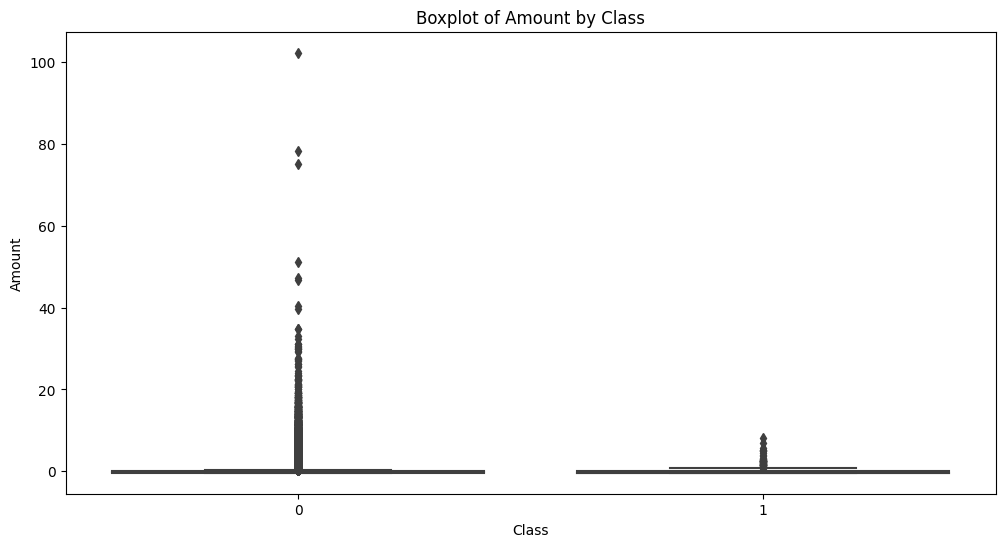

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Boxplot of Amount by Class')
plt.show()

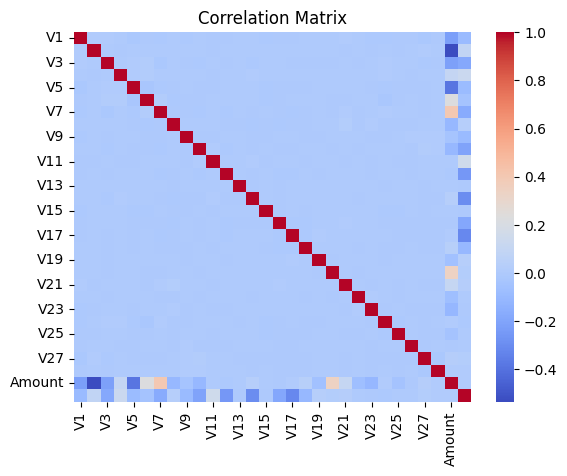

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

### Handaling Unbalanced Dataset

#### Undersampling

In [ ]:
#Seprating the data for analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [ ]:
print('Legit Transaction :',legit.shape)
print('Fraud Transaction : ',fraud.shape)

Legit Transaction : (275190, 30)
Fraud Transaction :  (473, 30)


In [ ]:
legit_sample = legit.sample(n=473)

#### Joining 2 Dataframes

In [ ]:
new_data = pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29395,-3.692532,-0.073583,0.215522,0.036928,-1.439595,-0.804291,-0.670331,1.473270,0.195859,-0.437599,...,0.177087,0.495107,0.120812,0.577025,0.081133,0.427320,0.270867,-0.379456,-0.305252,0
95060,-0.283939,1.355339,0.553398,0.255501,0.561040,-1.338352,1.056880,-0.229176,-0.738105,-1.157676,...,-0.076192,-0.211969,-0.256209,0.259185,0.096589,0.327896,0.021232,0.083294,-0.350191,0
3419,1.354411,-0.161842,-0.753201,-1.440966,0.539938,0.298591,-0.046785,0.065108,0.911044,-0.792643,...,0.006632,0.172246,-0.337976,-1.690436,0.927497,-0.481274,0.049816,-0.013568,-0.349231,0
12563,1.069279,0.302666,1.784368,3.010795,-0.926744,0.004473,-0.633628,0.070585,1.407524,0.120971,...,-0.206776,-0.249064,0.083740,0.633816,0.215638,-0.103063,0.011572,0.035294,-0.277426,0
92447,1.108719,-0.634489,0.844493,0.198142,-1.080133,-0.096494,-0.605342,0.097510,1.315663,-0.467906,...,-0.229892,-0.586317,-0.037634,-0.052136,0.157601,0.967951,-0.051340,0.020411,-0.035222,0


In [ ]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [ ]:
new_data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.001482,-0.049294,0.146612,0.022110,0.013715,-0.037523,0.020032,-0.000340,-0.033464,-0.006085,...,0.029505,0.011511,-0.023504,-0.029648,-0.013103,-0.006929,-0.001817,-0.010511,-0.013334,0.015763
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.142021


### SPLITTING THE DATA

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = new_data.drop(columns = 'Class',axis=1)
y = new_data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,stratify = y, random_state = 2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(946, 29) (756, 29) (190, 29)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
x_test_prediction1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(x_test_prediction1, y_test)

0.9368421052631579

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,x_test_prediction1)

0.946236559139785

In [ ]:
recall_score(y_test,x_test_prediction1)

0.9263157894736842

In [ ]:
f1_score(y_test,x_test_prediction1)

0.9361702127659575

In [ ]:
from sklearn.metrics import confusion_matrix as confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, x_test_prediction1)
cm

array([[90,  5],
       [ 7, 88]])

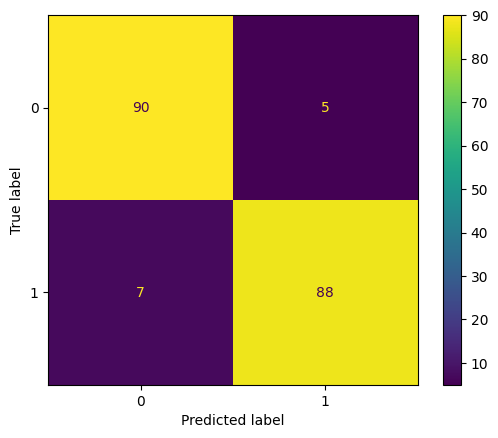

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, x_test_prediction1)
plt.show()

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
x_test_prediction2 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,x_test_prediction2)

0.9368421052631579

In [ ]:
precision_score(y_test,x_test_prediction2)

0.946236559139785

In [ ]:
recall_score(y_test,x_test_prediction2)

0.9263157894736842

In [ ]:
f1_score(y_test,x_test_prediction2)

0.9361702127659575

In [ ]:
cm = confusion_matrix(y_test, x_test_prediction2)
cm

array([[90,  5],
       [ 7, 88]])

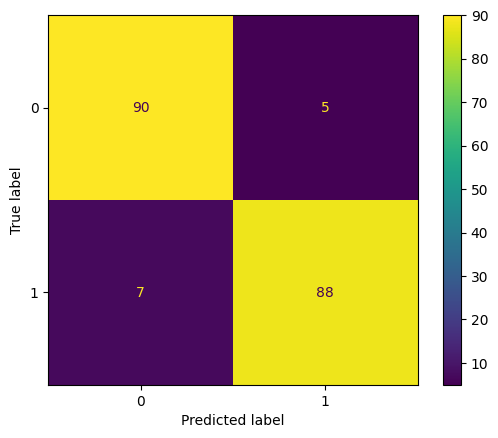

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, x_test_prediction2)
plt.show()

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
x_test_prediction3 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,x_test_prediction3)

0.9473684210526315

In [ ]:
precision_score(y_test,x_test_prediction3)

0.9885057471264368

In [ ]:
recall_score(y_test,x_test_prediction3)

0.9052631578947369

In [ ]:
f1_score(y_test,x_test_prediction3)

0.945054945054945

In [ ]:
cm = confusion_matrix(y_test, x_test_prediction2)
cm

array([[90,  5],
       [ 7, 88]])

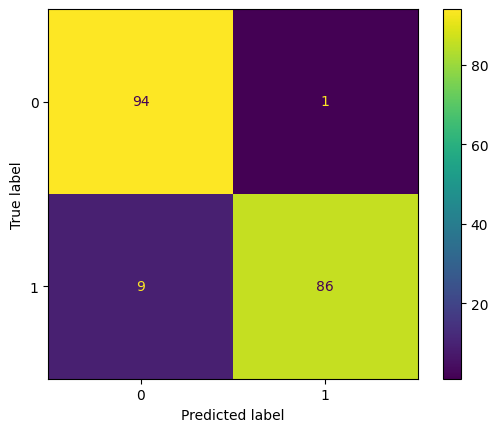

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, x_test_prediction3)
plt.show()

In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
                "ACC":[accuracy_score(y_test,x_test_prediction1)*100,
                      accuracy_score(y_test,x_test_prediction2)*100,
                      accuracy_score(y_test,x_test_prediction3)*100
                      ]})

In [ ]:
final_data

,Models,ACC
0,LR,93.684211
1,DT,93.684211
2,RF,94.736842


<Axes: xlabel='Models', ylabel='ACC'>

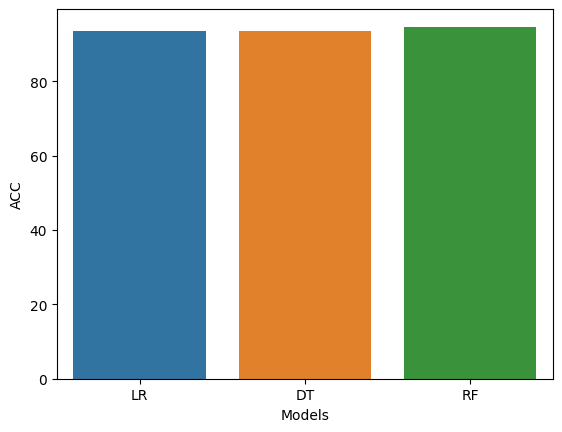

In [ ]:
sns.barplot(x='Models', y='ACC', data=final_data)

#### Oversampling

In [ ]:
x = data.drop('Class',axis=1)
y = data['Class']

In [ ]:
x.shape

(275663, 29)

In [ ]:
y.shape

(275663,)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [ ]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.20,
                                                 random_state=42)

### Logistic Regression

In [ ]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
x_test_prediction1 = log.predict(x_test)

In [ ]:
accuracy_score(y_test,x_test_prediction1)

0.9446473345688433

In [ ]:
precision_score(y_test,x_test_prediction1)


0.9726882634915726

In [ ]:
recall_score(y_test,x_test_prediction1)

0.9149137319782558

In [ ]:
f1_score(y_test,x_test_prediction1)

0.9429168345215899

In [ ]:
cm = confusion_matrix(y_test, x_test_prediction1)
cm

array([[53660,  1413],
       [ 4680, 50323]])

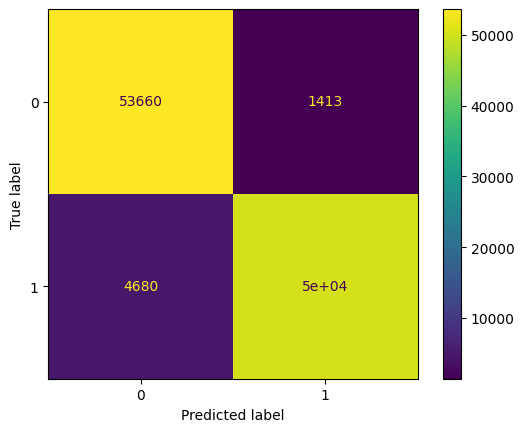

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, x_test_prediction1)
plt.show()

## Decision Tree Classifier


In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
x_test_prediction2 = dt.predict(x_test)

In [ ]:
accuracy_score(y_test,x_test_prediction2)

0.9983284276318181

In [ ]:
precision_score(y_test,x_test_prediction2)


0.9976758965047662

In [ ]:
recall_score(y_test,x_test_prediction2)

0.9989818737159791

In [ ]:
f1_score(y_test,x_test_prediction2)

0.9983284580025072

In [ ]:
cm = confusion_matrix(y_test, x_test_prediction2)
cm

array([[54945,   128],
       [   56, 54947]])

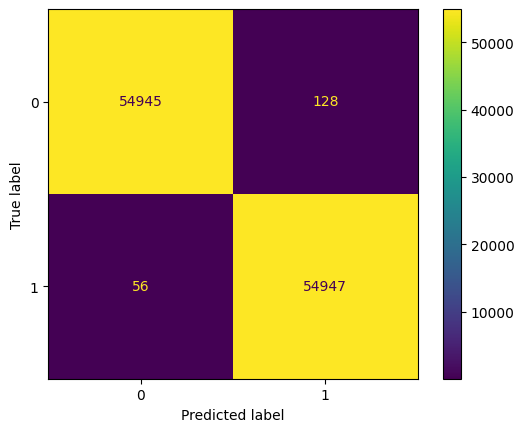

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, x_test_prediction2)
plt.show()

## Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
x_test_prediction3 = rf.predict(x_test)

In [ ]:
accuracy_score(y_test,x_test_prediction3)

0.9999273229405138

In [ ]:
precision_score(y_test,x_test_prediction3)


0.9998545745396376

In [ ]:
recall_score(y_test,x_test_prediction3)

1.0

In [ ]:
f1_score(y_test,x_test_prediction3)

0.9999272819822931

In [ ]:
cm = confusion_matrix(y_test, x_test_prediction3)
cm

array([[55065,     8],
       [    0, 55003]])

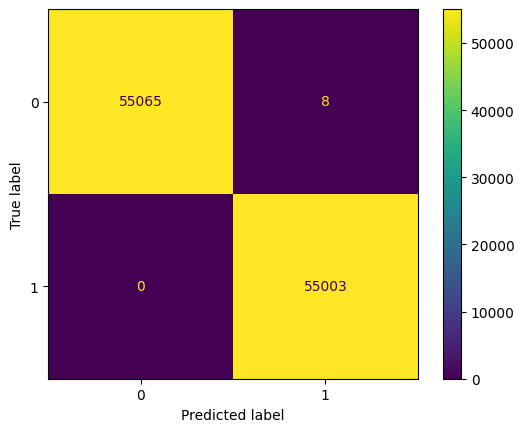

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, x_test_prediction3)
plt.show()

In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,x_test_prediction1)*100,
                     accuracy_score(y_test,x_test_prediction2)*100,
                     accuracy_score(y_test,x_test_prediction3)*100
                    ]})

In [ ]:
final_data

,Models,ACC
0,LR,94.464733
1,DT,99.832843
2,RF,99.992732


<Axes: xlabel='Models', ylabel='ACC'>

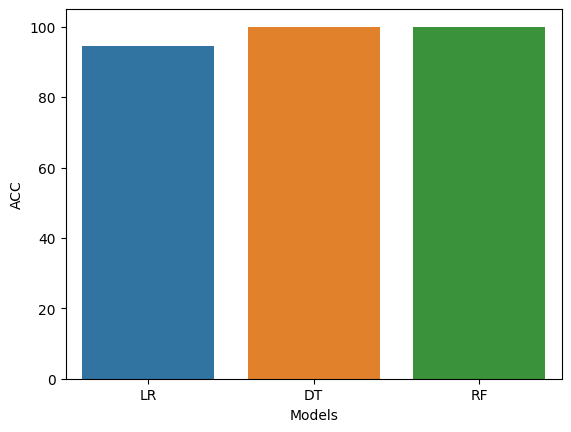

In [ ]:
sns.barplot(x='Models', y='ACC', data=final_data)